# Plot and analyze results of CO or ONe nova mppnp post-processing computations, including plots for the Cl-34 project

#### Read comments at the beginning of each cell to understand what it does

In [1]:
# on astrohub server use ipympl that enables the interactive features of 
# matplotlib in the Jupyter notebook and in JupyterLab
%pylab ipympl

# for a classic jupyter notebook
#%pylab nbagg

from nugridpy import nugridse as nuse
from nugridpy import utils as ut
import h5py

# begin counting figures
ifig=0
for i in range(0,10000):
    close(i)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the following commands allow to produce a nice pdf version of the notebook with figures:
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

rcParams.update({'axes.titlesize': 16,
                 'axes.labelsize': 16, 
                 'ytick.labelsize': 16,
                 'xtick.labelsize': 16,
                 'legend.fontsize': 14,
                 'figure.figsize': (12,8),
                 'font.size': 16})

In [3]:
# name of your directory on astrohub/outreach server
name = 'student_test' # 'your_name'

# choose between CO and ONe nova cases

#nova_case = 'co_nova'
nova_case = 'ne_nova'

# e.g. CO Nova with M=1.15, T=12, dM/dt=2e-10, 3010 cycles obtained with ./run_mesa 1.15 12 X 3010
# or ONe Nova with M=1.3, T=30, dM/dt=2e-10, 2010 cycles obtained with ./run_mesa 1.3 30 X 2010 

# path to MESA nova work directory
# on astrohub/wendi2 server
mesa_work_dir = '/user/scratch14_outreach/'+name+'/canpan_projects/nova/nova_framework_canpan/' 

# path to the corresponding mppnp (multi-zone) post-processing directory
# on astrohub/wendi2 server
mppnp_nova_dir = '/user/scratch14_outreach/'+name+'/canpan_projects/nova/run_nova_canpan/'

# path to the corresponding ppn (one-zone) post-processing directory
# on astrohub/wendi2 server
ppn_nova_dir = '/user/scratch14_outreach/'+name+'/canpan_projects/nova/ppn_nova_canpan/'

# path to mppnp installation directory
mppnp_work_dir = '/user/scratch14_wendi3/dpa/nuppn_nova/frames/mppnp/'

In [4]:
# read profiles.index file from path to LOGS directory that contains results of MESA nova computations
nova_dir = mesa_work_dir+nova_case+'/LOGS/'
f = open(nova_dir+'profiles.index', 'r')

profiles = []

i=0
for line in f:
    if i >= 1:
        profiles.append(int(float(line.split()[0])))
    i += 1
    
f.close()

print ("There are",len(profiles),"profiles for the following models:\n", profiles)

There are 103 profiles for the following models:
 [1, 11, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2010]


In [5]:
# select profiles of every_nth_1 model before and every_nth_2 model after cycle_1 along evolutionary track to plot
cycle_1 = 500
every_nth_1 = 4
every_nth_2 = 16

model_sel = []

for i in range(len(profiles)):
    if profiles[i] <= cycle_1:
        if i%every_nth_1 == 0:
            model_sel.append(profiles[i])
    else:
        if i%every_nth_2 == 0:
            model_sel.append(profiles[i]) 

model_sel

[1, 60, 140, 220, 300, 380, 460, 620, 940, 1260, 1580, 1900]

In [6]:
# read in results of CO or ONe nova mppnp post-processing
# ignore the mesage ValueError: Unknown format code 'f' for object of type 'str'

# ignore the message 
# ValueError: Unknown format code 'f' for object of type 'str' 
# following the execution of this command

s=nuse.se(mppnp_nova_dir+'H5_out')

Searching files, please wait.......
Writing preprocessor files
ne_nova_hdf.0000201.out.h5
ne_nova_hdf.0001501.out.h5
ne_nova_hdf.0000601.out.h5
ne_nova_hdf.0001901.out.h5
ne_nova_hdf.0001401.out.h5
ne_nova_hdf.0001101.out.h5
ne_nova_hdf.0001301.out.h5
ne_nova_hdf.0000501.out.h5
ne_nova_hdf.0000701.out.h5
ne_nova_hdf.0000101.out.h5
ne_nova_hdf.0001701.out.h5
ne_nova_hdf.0001001.out.h5
ne_nova_hdf.0001601.out.h5
ne_nova_hdf.0000001.out.h5
ne_nova_hdf.0000901.out.h5
ne_nova_hdf.0000801.out.h5
ne_nova_hdf.0000301.out.h5
ne_nova_hdf.0001201.out.h5
ne_nova_hdf.0001801.out.h5
ne_nova_hdf.0000401.out.h5


Exception in thread Thread-3:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/nugridpy/h5T.py", line 458, in run
    write(self.preprocName,header,dcols,data,sldir=self.filename)
  File "/usr/local/lib/python3.6/dist-packages/nugridpy/ascii_table.py", line 480, in write
    tmp1=data_fmt.format(data[i][j])
ValueError: Unknown format code 'f' for object of type 'str'



In [7]:
# determine mass range for plots
# plots will be made for Mr > m_bot
cycle = int(s.se.cycles[-1])

mass = s.get(cycle,'mass')
xh = s.get(cycle,'H-1')
m_bot = -1

for i in range(len(mass)):
    if xh[i] > 1e-10 and m_bot < 0:
        m_bot = mass[i]
        
mass = 1e5*(mass - m_bot)
xmax = 0.1*(max(mass)//0.1)+0.2

print (m_bot,xmax)

 reading ['iso_massf']...100%1.2999996970735799 0.9000000000000001


 reading ['iso_massf']...100%

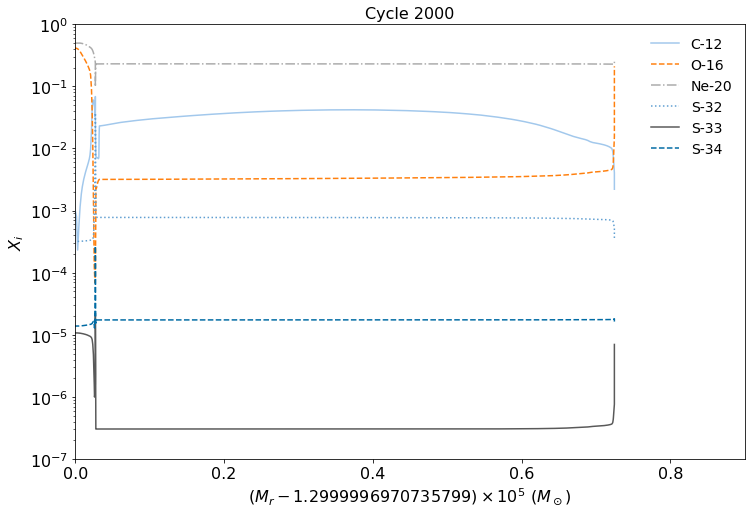

In [8]:
# plot abundance profiles for isotopes in isos for the last cycle
isos = ['C-12','O-16','Ne-20','S-32','S-33','S-34']

# take the last cycle multiple of 1000
plot_cycle = 1000*(profiles[-1]//1000)

ifig=ifig+1;close(ifig);fig=figure(ifig)

mass = 1e5*(s.get(plot_cycle,'mass') - m_bot)

j = 0
for iso in isos:
    thing = s.get(plot_cycle,iso)
    semilogy(mass,thing,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label=iso)
    j += 1
    
xlim(0,xmax)
ylim(1e-7,1e0)
xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
ylabel('$X_i$')
title('Cycle '+str(plot_cycle))
legend(frameon=False)
show()

 reading ['iso_massf']...100%

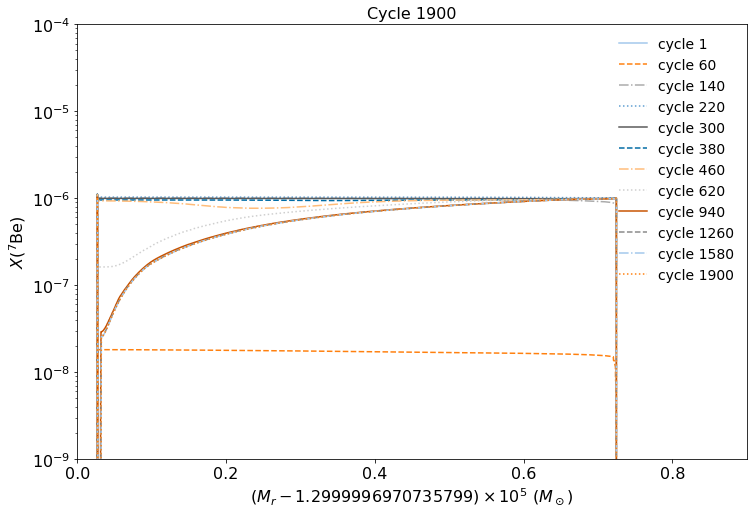

In [9]:
# plot Be-7 abundance profiles for selected nova models
ifig=ifig+1;close(ifig);fig=figure(ifig)

isos = ['Be-7']

j = 0
for plot_cycle in model_sel:

    mass = 1e5*(s.get(plot_cycle,'mass') - m_bot)

    for iso in isos:
        thing = s.get(plot_cycle,iso)
        semilogy(mass,thing,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='cycle '+str(plot_cycle))
    j += 1
    
xlim(0,xmax)
ylim(1e-9,1e-4)
xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
ylabel('$X(^7\mathrm{Be})$')
title('Cycle '+str(plot_cycle))
legend(frameon=False,loc=1)
show()

 reading ['iso_massf']...100%

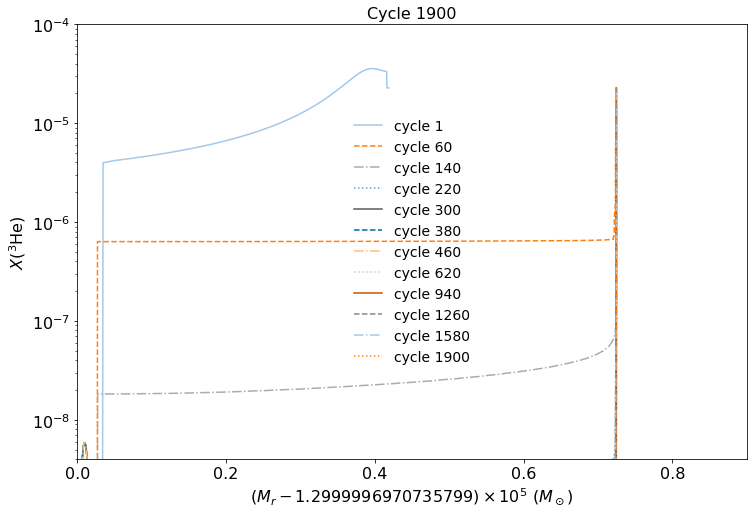

In [10]:
# plot He-3 abundance profiles for selected nova models
ifig=ifig+1;close(ifig);fig=figure(ifig)

isos = ['He-3']

j = 0
for plot_cycle in model_sel:

    mass = 1e5*(s.get(plot_cycle,'mass') - m_bot)

    for iso in isos:
        thing = s.get(plot_cycle,iso)
        semilogy(mass,thing,color=ut.linestylecb(j)[2],\
             linestyle=ut.linestylecb(j)[0],label='cycle '+str(plot_cycle))
    j += 1
    
xlim(0,xmax)
ylim(4e-9,1e-4)
xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
ylabel('$X(^3\mathrm{He})$')
title('Cycle '+str(plot_cycle))
legend(frameon=False)
show()

In [11]:
# prepare list of increasing nova mass (it may take a couple of minutes)
ncyc = int(s.se.cycles[-1])

cyc = linspace(1,ncyc,ncyc)
max_mass = linspace(0,0,ncyc)
for cycle in range(ncyc):
    mass = s.get(cycle,'mass')
    max_mass[cycle] = max(mass)

mass_accr = max(max_mass)-min(max_mass)
print ('\nThe total accreted mass is',mass_accr)
mass_env = max_mass[0]-m_bot
print ('\nThe initial envelope mass is',mass_env)

 reading ['mass']...100%
The total accreted mass is 3.059615271805427e-06

The initial envelope mass is 4.186320819776768e-06


In [12]:
# find maximum temperature and its corresponding density for all cycles (it may take a few minutes)
t9_max = linspace(0,0,ncyc)
rho_max = linspace(0,0,ncyc)

for cycle in range(ncyc):
    tem = s.get(cycle,'temperature')
    rho = s.get(cycle,'rho')
    item_max = argmax(tem)
    t9_max[cycle] = max(tem)
    rho_max[cycle] = rho[item_max]

 reading ['rho']...100%]...100%

In [13]:
# find a cycle with maximum T and its age, use this age as age zero-point
cyc_t9max = argmax(t9_max)
print ('\nMaximum temperature T9 =',max(t9_max),'is reached at cycle',cyc_t9max)
age_t9max = s.get(cyc_t9max,'age')
age_minute = linspace(0,0,ncyc)

for cycle in range(ncyc):
    age = s.get(cycle,'age')
    age_minute[cycle] = (age - age_t9max)/60.


Maximum temperature T9 = 0.28884234511755336 is reached at cycle 218
 reading ['age']...100%

 reading ['iso_massf']...100%

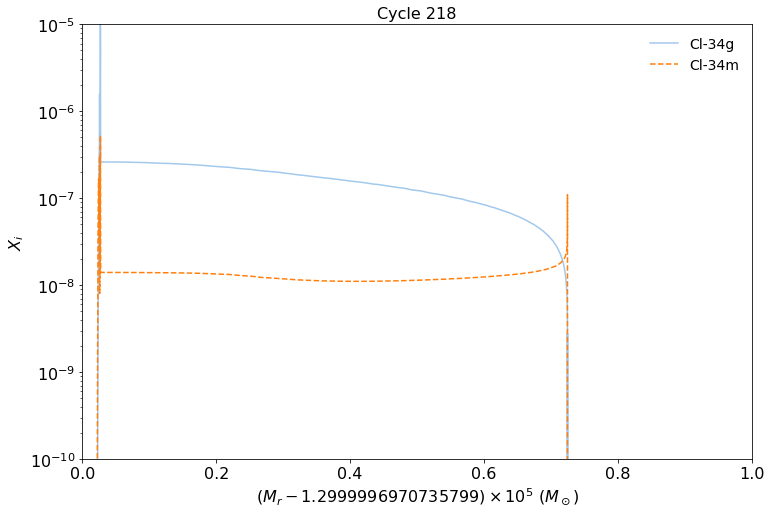

In [14]:
# plot abundance profiles for Cl-34 isomers for cycle with maximum temperature
ifig=ifig+1;close(ifig);fig=figure(ifig)

plot_cycle = cyc_t9max

mass = 1e5*(s.get(plot_cycle,'mass') - m_bot)
xs=s.get(plot_cycle,'iso_massf')

icl34m = 39
icl34g = 53
xcl34m = xs[:,icl34m]
xcl34g = xs[:,icl34g]

semilogy(mass,xcl34g,color=ut.linestylecb(0)[2],linestyle=ut.linestylecb(0)[0],label='Cl-34g')
semilogy(mass,xcl34m,color=ut.linestylecb(1)[2],linestyle=ut.linestylecb(1)[0],label='Cl-34m')
    
xlim(0,1)
ylim(1e-10,1e-5)
xlabel('$(M_r-$'+str(m_bot)+'$)\\times 10^5\ (M_\odot)$')
ylabel('$X_i$')
title('Cycle '+str(plot_cycle))
legend(frameon=False)
show()

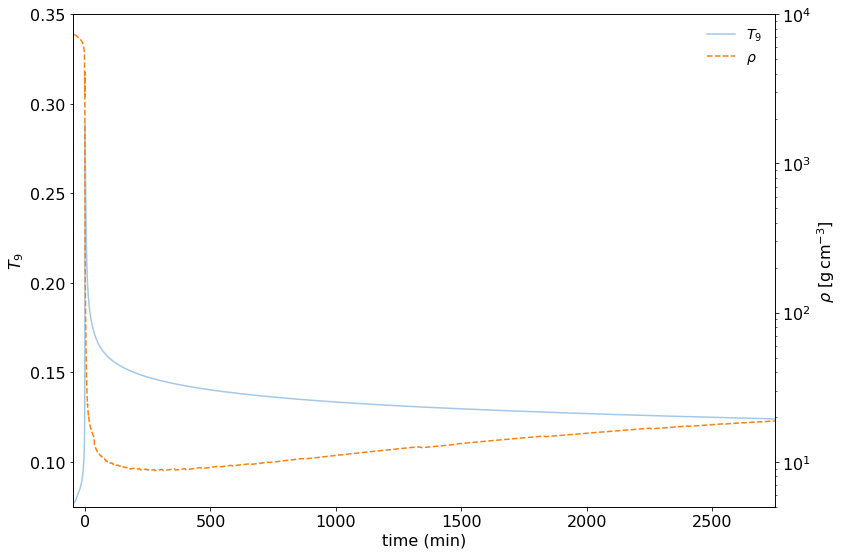

In [15]:
# plot evolutionary profiles of maximum T and rho
cyc0 = cyc_t9max

ifig = ifig+1

fig, ax1 = subplots()

name1 = '$T_9$'
lns1 = ax1.plot(age_minute[cyc_t9max-cyc0:-1], t9_max[cyc_t9max-cyc0:-1],\
                color=ut.linestylecb(0)[2], linestyle=ut.linestylecb(0)[0],label=name1)

ax1.set_xlabel('time (min)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel(name1)
ax1.tick_params(axis='both')

age_minute_max = 2750.
ax1.set_xlim(-50,age_minute_max)

t9_max_min = 0.075
ax1.set_ylim(t9_max_min,0.350)

ax2 = ax1.twinx()
name2 = '$\\rho$'
lns2 = ax2.semilogy(age_minute[cyc_t9max-cyc0:-1], rho_max[cyc_t9max-cyc0:-1],\
            color=ut.linestylecb(1)[2],linestyle=ut.linestylecb(1)[0],label=name2)
ax2.set_ylabel(name2+'$\ [\mathrm{g\,cm}^{-3}]$')
ax2.tick_params('y')
ax2.set_ylim(5e0,1e4)

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1, frameon=False)

fig.tight_layout()
fig.show()

plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/maxTrho_evolution.pdf')

In [16]:
# save evolutonary changes of maximum T and rho in trajectory file that can be used by ppn code in one-zone simulations
file_out="trajectory.input"
fout=open(ppn_nova_dir+file_out,'w')

line1_out="# time T rho\n"
line2_out="# YRS/SEC; T8K/T9K; CGS/LOG\n"
line3_out="# FORMAT: '(10x,A3)'\n"
line4_out="AGEUNIT = YRS\n"
line5_out="TUNIT   = T9K\n"
line6_out="RHOUNIT = CGS\n"
line7_out="ID = 0\n"

fout.write(line1_out)
fout.write(line2_out)
fout.write(line3_out)
fout.write(line4_out)
fout.write(line5_out)
fout.write(line6_out)
fout.write(line7_out)

i1 = cyc_t9max-cyc0+1
i2 = len(age_minute)

fac_min_to_yr = 365.2422*1440.
key = -1

for i in range(i1,i2):
    if (t9_max[i] >= t9_max_min and age_minute[i] <= age_minute_max):
        if (key < 0):
            age_minute_0 = age_minute[i]
            key = +1
        line_out=" "+str("{:.6}".format((age_minute[i]-age_minute_0)/fac_min_to_yr))+" "+str("{:.4}".format(t9_max[i]))\
            +" "+str("{:.6}".format(rho_max[i]))+"\n"
        #line_out=" "+str(time[i])+" "+str(tem[i])+" "+str(den[i])+" "+str(xh[i])+"\n"  # with X
        fout.write(line_out)
fout.close()

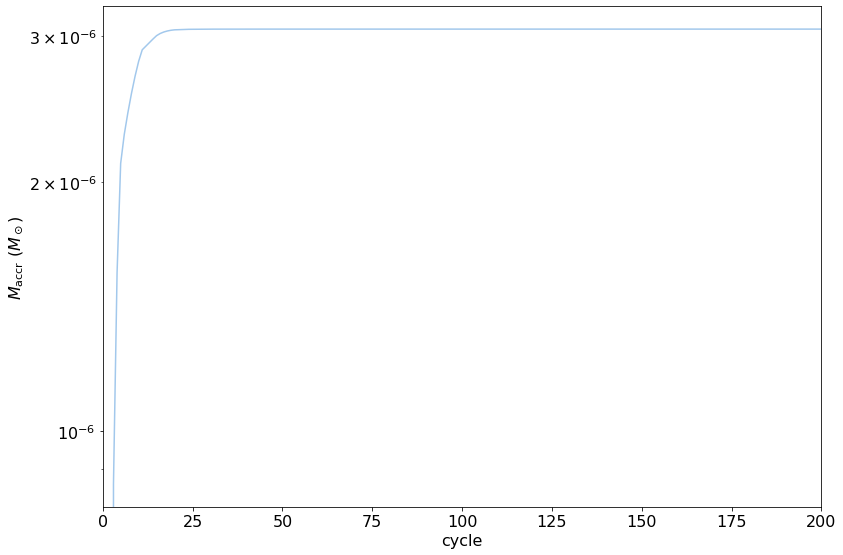

In [17]:
# plot nova accreted mass 
ifig=ifig+1;close(ifig);fig=figure(ifig)

min_mass = min(max_mass)
semilogy(cyc,max_mass-min_mass,color=ut.linestylecb(0)[2],linestyle=ut.linestylecb(0)[0])
xlim(0,200)
xlabel('cycle')
ylabel('$M_\mathrm{accr}\ (M_\odot)$')
tight_layout()
show()

 reading ['mass']...100%Using the following conditions:
	mass_range: 1.29999996688 1.299999967
	Atomic mass_range: 1 40
	cycle:            0000001999
	plot only stable: False
	plot decayed:     False
['-', '--', '-.', ':', '-']


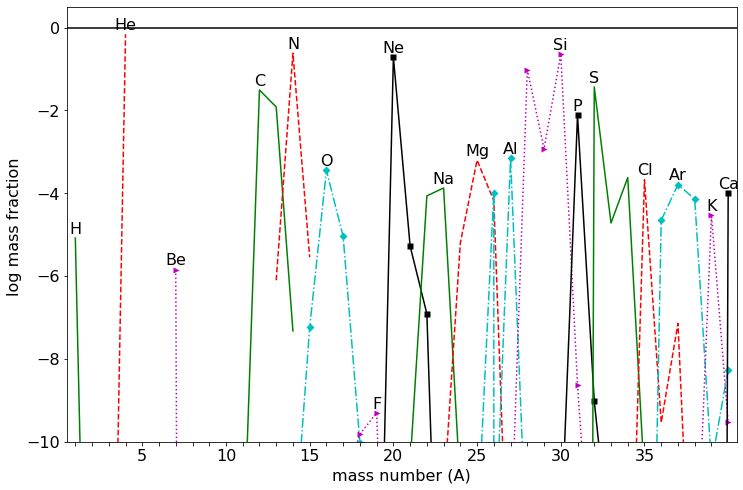

In [18]:
# plot abundances of unstable isotopes mass-averaged over nova envelope
ifig=ifig+1;close(ifig);fig=figure(ifig)

if nova_case == 'co_nova':
    # 1.15 Msun co nova
    s.iso_abund(cycle,amass_range=[1,40],mass_range=[1.15,1.150005],stable=False,ylim=[-10,0.5])
elif nova_case == 'ne_nova':
    # 1.3 Msun ne nova
    s.iso_abund(cycle,amass_range=[1,40],mass_range=[1.29999996688,1.299999967],stable=False,ylim=[-10,0.5])
else:
    print ("\nnova case is not known")

## Read in solar isotopic abundances

In [19]:
# these are the solar abundances used in nova sims
sol_ab = mppnp_work_dir + 'USEEPP/iniab2.0E-02GN93.ppn'

f = open(sol_ab, 'r')

sol_iso_z=[]
sol_iso=[]
sol_iso_name = []
sol_iso_a = []
sol_iso_abu=[]

for line in f:
    n = len(line.split())
    if n == 3:
        sol_iso = line.split()[1]
        if sol_iso == 'PROT':
            sol_iso_name.append('h')
            sol_iso_a.append(1)
            sol_iso_z.append(int(line.split()[0]))
            sol_iso_abu.append(float(line.split()[2]))
        else:
            sol_iso_name.append(sol_iso[0:2])
            sol_iso_a.append(int(sol_iso[2:5]))
            sol_iso_z.append(int(line.split()[0]))
            sol_iso_abu.append(float(line.split()[2]))
    if n == 4:
        sol_iso_z.append(int(line.split()[0]))
        sol_iso_name.append(line.split()[1])
        sol_iso_a.append(int(line.split()[2]))
        sol_iso_abu.append(float(line.split()[3]))

f.close()

n_iso_sol = len(sol_iso_z)

#for i in range(n_iso_sol):
#    print (i,sol_iso_z[i], sol_iso_name[i], sol_iso_a[i], sol_iso_abu[i])

## Read in nova post-processed surface composition, averaged over envelope mass with unstable isotopes both undecayed and allowed to decay for 1 Gyr

In [20]:
work_dir = mppnp_nova_dir+'H5_surf/'

model = 1000*(profiles[-1]//1000)

file_name = nova_case+'_hdf'

suffix = "."+str(((model-1)//100)*100+1).zfill(7)+".surf.h5"

h5_file = work_dir+file_name+suffix
file = h5py.File(h5_file, 'r')   # 'r' means that hdf5 file is open in read-only mode    
dset = file["/cycle"+str(model).zfill(10)+"/SE_DATASET"]
el_abu = dset['elem_massf_decay'][0]
iso_abu = dset['iso_massf_decay'][0]  # decayed abundances
iso_abu_undec = dset['iso_massf'][0]  # undecayed abundances
file.close()
n_el = len(el_abu)
n_iso = len(iso_abu)

print ("number of stable elements is",n_el,"\nnumber of stable isotopes is",n_iso)

el_name=["  " for x in range(n_el)]
z_el=linspace(0,0,n_el)
el_name[0]='n'
for i in range(n_el):
    z_el[i]=float(i)       #  Z=i in mppnp surf data output
    if (i>0):
        el_name[i]=ut.get_el_from_z(i)        

number of stable elements is 85 
number of stable isotopes is 157


In [21]:
# A and Z numbers of isotopes in nova model
iso_z=np.linspace(0,0,n_iso)
iso_a=np.linspace(0,0,n_iso)
iso_name=["  " for x in range(n_iso)]

file = h5py.File(h5_file, 'r')
dseta = file["A"]
dsetz = file["Z"]
iso_a[:] = dseta[:]
iso_z[:] = dsetz[:]
file.close()

iso_name[0] = 'n'
iso_name[1] = 'H'

for i in range(2,n_iso):
    iz = int(iso_z[i])
    #print (iz)
    iso_name[i] = ut.get_el_from_z(int(iso_z[i]))
    
print ("\n")
for i in range(n_iso):
    if (i>0 and int(iso_a[i])<999):
        #print (i, str(int(iso_z[i]))+" "+iso_name[i]+"-"+str(int(iso_a[i]))+" "+str(iso_abu[i])+"\n")
        if iso_z[i] == 16 and iso_a[i] == 32:
            xs32 = iso_abu[i]
        if iso_z[i] == 16 and iso_a[i] == 33:
            xs33 = iso_abu[i]
        if iso_z[i] == 16 and iso_a[i] == 34:
            xs34 = iso_abu[i]

## If they are already available, read in results of one-zone post-processing nucleosynthesis computations obtained with the ``ppn`` code, e.g. using ``ppn_nova`` ``example`` for this nova model (with the previously-generated file ``trajectory.input``), otherwise skip this cell 

In [22]:
# Have you already done one-zone post-processing of this nova model with the ppn code?
ppn_done = True # False # True

In [23]:
if ppn_done:

    data_dir = ppn_nova_dir
    
    # which ppn cycle to use for comparison with multi-zone computations?
    ppn_cycle = 974

    ppn_file = 'iso_massf'+str(ppn_cycle).zfill(5)+'.DAT'
    print (ppn_file)

    f1=open(data_dir+ppn_file)
    lines=f1.readlines()
    f1.close()

    massfrac=[]
    A=[]
    Z=[]
    element = []
    AI = []

    for k in range(len(lines)):
        # skip header
        if k<7:
            continue
    
        line=lines[k]
        #print (line[0:5].strip(), line[6:12].strip(), line[13:17].strip(), line[24:35].strip(), \
        #       line[37:39].strip(), line[39:43].strip())
        Z.append(line[6:12].strip()) # Z
        A.append(line[13:17].strip()) # A float
        massfrac.append(line[24:35].strip()) # massf
        element.append(line[37:39].strip()) # element (execept NEUT (first) and PROT (second))
        AI.append(line[39:43].strip()) # A integer

    n_iso_ppn = len(A)
    element[0] = 'n'
    AI[0] = '1'
    element[1] = 'H'
    AI[1] ='1'
    element[n_iso_ppn-2] = 'ALm'
    AI[n_iso_ppn-2] ='26'
    element[n_iso_ppn-1] = 'KRm'
    AI[n_iso_ppn-1] ='85'

    #kp = 0
    #print mc, n_iso
    #print kp, float(Z[kp]), float(A[kp]), element[kp], int(AI[kp]), float(massfrac[kp])

    iso_z_ppn = np.linspace(0,0,n_iso_ppn)
    iso_a_ppn = np.linspace(0,0,n_iso_ppn)
    iso_name_ppn = ["  " for x in range(n_iso_ppn)]
    
    iso_abu_ppn = np.linspace(0,0,n_iso_ppn)

    for i in range(n_iso_ppn):
        iso_name_ppn[i] = element[i]
        iso_a_ppn[i] = float(A[i])
        iso_z_ppn[i] = float(Z[i])
        iso_abu_ppn[i] = float(massfrac[i])

iso_massf00974.DAT


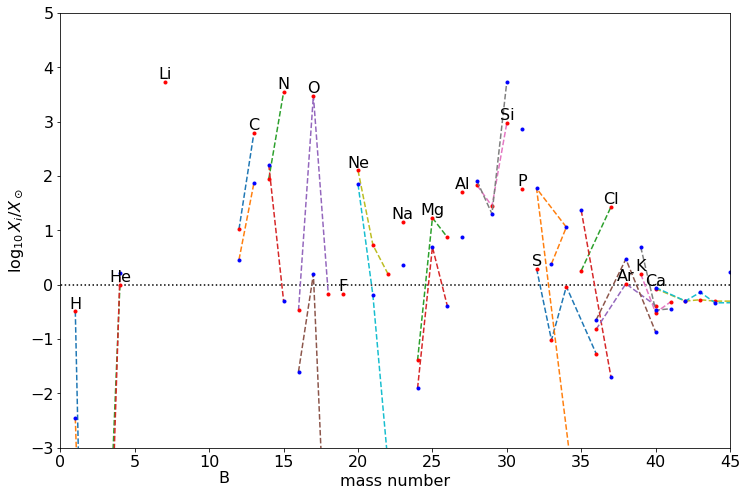

<Figure size 864x576 with 0 Axes>

In [24]:
# plot nova surface composition
ifig=ifig+1;close(ifig);fig=figure(ifig)

z1 = 1; z2 = 25
for z in range(z1,z2):
    a_plot = []
    y_plot = []
    y_plot_undec = []
    if ppn_done:
        a_plot_ppn = []
        y_plot_ppn = []
    for i in range(n_iso):
        if int(iso_z[i]) == z:
            for k in range(n_iso_sol):
                if sol_iso_z[k] == z and sol_iso_a[k] == iso_a[i]:
                    a_plot.append(sol_iso_a[k])
                    y_plot.append(log10(iso_abu[i]/sol_iso_abu[k])) 
                    y_plot_undec.append(log10(iso_abu_undec[i]/sol_iso_abu[k])) 
    if ppn_done:
        for i in range(n_iso_ppn):
            if int(iso_z_ppn[i]) == z:
                for k in range(n_iso_sol):
                    if sol_iso_z[k] == z and sol_iso_a[k] == iso_a_ppn[i]:
                        a_plot_ppn.append(sol_iso_a[k])
                        y_plot_ppn.append(log10(iso_abu_ppn[i]/sol_iso_abu[k])) 
    if len(a_plot) > 0:
        #print (z, a_plot, y_plot)
        text(a_plot[argmax(y_plot)],max(y_plot),ut.get_el_from_z(z),\
             horizontalalignment='center',verticalalignment='bottom',fontsize=16)
        #text(a_plot[argmax(y_plot_undec)],max(y_plot_undec),ut.get_el_from_z(z),\
        #     horizontalalignment='center',verticalalignment='bottom',fontsize=10)
    if len(a_plot) > 1:
        a_plot, y_plot = (list(t) for t in zip(*sorted(zip(a_plot, y_plot))))
        a_plot, y_plot_undec = (list(t) for t in zip(*sorted(zip(a_plot, y_plot_undec))))
    plot(a_plot,y_plot,'--')
    plot(a_plot,y_plot,'ro',markersize=3)
    #plot(a_plot,y_plot_undec,'-.')
    #plot(a_plot,y_plot_undec,'bo',markersize=3)
    if ppn_done:
        plot(a_plot_ppn,y_plot_ppn,'--')
        plot(a_plot_ppn,y_plot_ppn,'bo',markersize=3)

xamin = 0; xamax = 45
hlines(xamin,xamax,0.,linestyles='dotted')
xlim(xamin,xamax)
ylim(-3,5.0)
xlabel('mass number')
ylabel('$\log_{10}\,X_i/X_\odot$')
show()
plt.savefig(mesa_work_dir+nova_case+'/'+nova_case+'_plots/surface_comp.pdf')

## The following cells are used to plot S isotopic ratios for the Cl-34 project

In [25]:
print ("number of cycles is",ncyc,"\nnumber of stable isotopes is",n_iso)

number of cycles is 2000 
number of stable isotopes is 157


In [26]:
iso_abu_cyc = np.zeros((ncyc,n_iso),dtype=float) # this 2d array stores surface abundances from all cycles

for cycle in range(ncyc-1):
    cycle = cycle+1
    #file_name = "co_nova_hdf"
    file_name = "ne_nova_hdf"
    suffix = "."+str(((abs(cycle-1))//100)*100+1).zfill(7)+".surf.h5"

    h5_file = work_dir+file_name+suffix
    file = h5py.File(h5_file, 'r')   # 'r' means that hdf5 file is open in read-only mode    
    dset = file["/cycle"+str(cycle).zfill(10)+"/SE_DATASET"]
    iso_abu_cyc[cycle,:] = dset['iso_massf_decay'][0]
    
    file.close()

In [27]:
print ("\nnumber of cycles is",len(iso_abu_cyc[:,0]))


number of cycles is 2000


In [28]:
z = 16 # 14
iz = []
az = []
for i in range(n_iso):
    if int(iso_z[i]) == z and iso_abu[i] > 1e-20:
        iz.append(i)
        az.append(iso_a[i]) 
        
if len(az) > 1:
    az, iz = (list(t) for t in zip(*sorted(zip(az, iz))))

print (iz)
print (az)

[93, 51, 52, 95]
[32.0, 33.0, 34.0, 36.0]


In [29]:
sol_comp=ut.iniabu(sol_ab)

s33s32_sol=sol_comp.isoratio_init(['S-33','S-32'])
s34s32_sol=sol_comp.isoratio_init(['S-34','S-32'])

si29si28_sol=sol_comp.isoratio_init(['Si-29','Si-28'])
si30si28_sol=sol_comp.isoratio_init(['Si-30','Si-28'])

This initial abundance file uses an element name that does
not contain the mass number in the 3rd to 5th position.
It is assumed that this is the proton and we will change
the name to 'h   1' to be consistent with the notation used
in iniab.dat files


In [30]:
s33s32 = linspace(0,0,ncyc)
s34s32 = linspace(0,0,ncyc)

si29si28 = linspace(0,0,ncyc)
si30si28 = linspace(0,0,ncyc)

for cycle in range(ncyc-1):
    cycle = cycle+1
    s33s32[cycle] = (iso_abu_cyc[cycle,iz[1]]/iso_abu_cyc[cycle,iz[0]]/s33s32_sol - 1.)*1000.
    s34s32[cycle] = (iso_abu_cyc[cycle,iz[2]]/iso_abu_cyc[cycle,iz[0]]/s34s32_sol - 1.)*1000. 
    #si29si28[cycle] = (iso_abu_cyc[cycle,iz[1]]/iso_abu_cyc[cycle,iz[0]]/si29si28_sol - 1.)*1000.
    #si30si28[cycle] = (iso_abu_cyc[cycle,iz[2]]/iso_abu_cyc[cycle,iz[0]]/si30si28_sol - 1.)*1000.
    
print (s33s32[-1],s34s32[-1])
#print (si29si28[-1],si30si28[-1])

-951.427865381997 -531.5985608200547


In [31]:
# suspected nova S isotopic ratios from Iliadis et al, 2018, ApJ, 855, 76
# plus data from Bose & Starrfield, 2019, ApJ, 873, 14
del_S33 = [-92,48,-615,-82,-23,-833,-303,-121]
err_S33 = [222,334,385,279,143,167,110,141]
del_S34 = [162,-394,-542,-6,6,-435,-94,15]
err_S34 = [106,106,175,122,70,131,54,65]

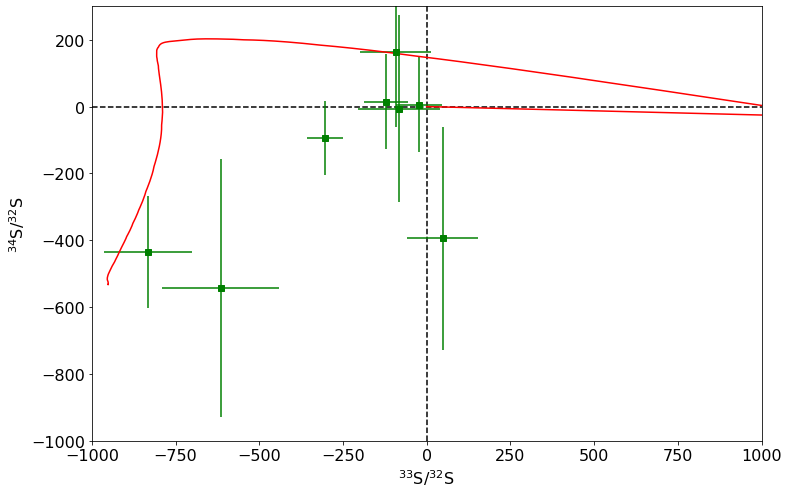

In [32]:
ifig=ifig+1;close(ifig);fig=figure(ifig)

xlabel('$^{33}\mathrm{S}/^{32}\mathrm{S}$')
ylabel('$^{34}\mathrm{S}/^{32}\mathrm{S}$')
xssmin = -1000; xssmax = 1000
yssmin = -1000; yssmax = 300
xlim(xssmin,xssmax);ylim(yssmin,yssmax)
hlines(0,xssmin,xssmax,color='k',linestyle='--')
vlines(0,yssmin,yssmax,color='k',linestyle='--')
errorbar(del_S33,del_S34,err_S33,err_S34,'gs')

plot(s33s32,s34s32,'r-',markersize=12)

show()